# Neural & Behavioral Modeling - Week 5 (Exercises)
by Your Name (Your Email)

In [2]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Drifit Diffusion Model (5 points)

Use whatever analytical methods to check if Tren's super EZ implementation(s) of the drift diffusion model produce exGaussian data, especially the exponential long tail. Remember to play around with different model parameters to see how they affect simulation results.

4

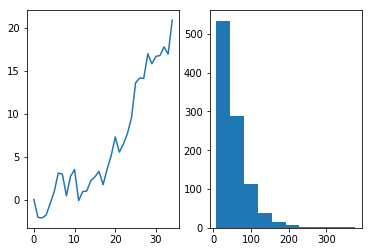

In [157]:
# Tren's implementation

from numpy import *

mu,sigma=0.2,2 # Diffusion type1
p=0.4 # Diffusion type2
Yend=20 # Threshold for response
Ntrial=1000

RTs=zeros(Ntrial)
for i in range(Ntrial):
    Y=0 # initial drift position
    Ys=[] # drift history
    RT=0 # Reset watch
    while(Y<Yend):
        dY=random.normal(2*mu,sigma); # type1
#         dY=float((random.rand(1)-p)>=0); # type2
        Y=Y+dY
        Ys.append(Y); # Diffusion history in each trial
        RT=RT+1 # clock is running
    RTs[i]=RT;
subplot(1,2,1);plot(Ys) # plot only the last trial to see the diffusion process
# subplot(1,2,2);hist(RTs, int(max(RTs) - min(RTs)));
subplot(1,2,2);hist(RTs);4

In [167]:
avg = average(RTs)
avg

54.442

In [168]:
## easier way
#srd(RTs)
all_sum = 0
for x in RTs:
    all_sum += (x - average(RTs))**2
std = sqrt(all_sum/(len(RTs)-1))
std

39.250161925923457

In [169]:
avg + 2*std

132.94232385184691

In [172]:
bigger_than_2_std = RTs[RTs > (avg + 2*std)]
bigger_than_2_std

array([ 139.,  142.,  149.,  154.,  198.,  187.,  135.,  153.,  192.,
        157.,  170.,  154.,  147.,  174.,  202.,  149.,  154.,  315.,
        156.,  296.,  169.,  193.,  203.,  178.,  133.,  151.,  151.,
        157.,  178.,  137.,  139.,  376.,  225.,  243.,  143.,  160.,
        195.,  142.,  141.,  180.,  137.,  136.,  178.,  171.,  160.,
        184.,  207.])

In [179]:
len(bigger_than_2_std)/len(RTs)
print(len(bigger_than_2_std)/len(RTs)*100, "%")

4.7 %


如果他是高斯分布的話，平均值加上兩個標準差後，大於兩個標準差所佔的比例應該約為2.27%左右，但是本次模擬結果顯示，所佔的比例約為4.7%，明顯高於理論值，可以觀察出有long tail decay的現象。

換測試三個標準差

In [181]:
avg + 3*std

172.19248577777037

In [182]:
bigger_than_3_std = RTs[RTs > (avg + 3*std)]
bigger_than_3_std

array([ 198.,  187.,  192.,  174.,  202.,  315.,  296.,  193.,  203.,
        178.,  178.,  376.,  225.,  243.,  195.,  180.,  178.,  184.,  207.])

In [183]:
len(bigger_than_3_std)/len(RTs)
print(len(bigger_than_3_std)/len(RTs)*100, "%")

1.9 %


如果是三個標準差，理論上來說應該剩下0.0032％比例的數值，但這次實驗卻仍有1.9%的數值，可以看出有long tial的情況

接著我嘗試做100次

In [201]:
# Tren's implementation

from numpy import *

mu,sigma=0.2,2 # Diffusion type1
p=0.4 # Diffusion type2
Yend=20 # Threshold for response
Ntrial=1000

RTs=zeros(Ntrial)

avg_S = zeros(100)
srd_S = zeros(100)
std_2_S_percentage = zeros(100)
std_3_S_percentage = zeros(100)

for j in range(100):
    for i in range(Ntrial):
        Y=0 # initial drift position
        Ys=[] # drift history
        RT=0 # Reset watch
        while(Y<Yend):
            dY=random.normal(2*mu,sigma); # type1
    #         dY=float((random.rand(1)-p)>=0); # type2
            Y=Y+dY
            Ys.append(Y); # Diffusion history in each trial
            RT=RT+1 # clock is running
        RTs[i]=RT;
    avg_S[j] = average(RTs)
    srd_S[j] = std(RTs)
    std_2_S_percentage[j] = len(RTs[RTs > (average(RTs) + 2*std(RTs))]) / len(RTs)
    std_3_S_percentage[j] = len(RTs[RTs > (average(RTs) + 3*std(RTs))]) / len(RTs)
# subplot(1,2,1);plot(Ys) # plot only the last trial to see the diffusion process
# # subplot(1,2,2);hist(RTs, int(max(RTs) - min(RTs)));
# subplot(1,2,2);hist(RTs);4

In [202]:
avg_S

array([ 54.75 ,  53.118,  52.039,  53.821,  53.948,  52.494,  51.657,
        52.269,  53.919,  51.942,  53.915,  53.473,  53.089,  52.992,
        52.588,  52.698,  52.216,  53.024,  52.149,  52.5  ,  53.672,
        54.221,  52.616,  52.285,  51.668,  52.743,  54.616,  52.101,
        53.141,  52.95 ,  52.243,  52.707,  54.698,  52.893,  53.577,
        52.707,  52.657,  53.756,  54.378,  54.398,  52.965,  52.024,
        52.227,  53.134,  53.222,  52.385,  53.612,  52.645,  52.238,
        54.508,  54.706,  52.598,  53.231,  52.579,  51.629,  54.897,
        52.267,  53.612,  55.47 ,  54.014,  54.468,  53.167,  54.637,
        52.394,  53.115,  53.209,  53.283,  51.968,  51.621,  54.871,
        52.823,  52.72 ,  52.638,  52.683,  52.628,  53.919,  53.846,
        53.259,  53.102,  54.112,  52.552,  51.85 ,  53.222,  53.131,
        53.409,  54.563,  52.259,  55.015,  51.858,  53.526,  54.468,
        51.923,  54.052,  50.548,  53.124,  53.671,  53.084,  53.656,
        53.081,  53.

In [203]:
srd_S

array([ 36.28208235,  36.16000658,  35.86886504,  36.65126136,
        36.39496251,  38.01946822,  34.1754788 ,  33.98079809,
        36.60582521,  35.26673554,  38.26034207,  36.33859203,
        37.08893472,  37.88012587,  33.96130528,  36.42483762,
        34.45549802,  36.40356334,  33.31061091,  34.03686237,
        35.58134927,  39.56182704,  34.57939479,  35.06302575,
        34.59343545,  34.4054785 ,  36.78399848,  33.54717274,
        35.63825359,  36.16411896,  34.86218512,  34.94774887,
        37.98066345,  36.32095196,  36.34886616,  35.54111916,
        32.51829256,  37.19581245,  37.99890941,  36.61646619,
        35.74945839,  34.33973535,  34.6918358 ,  34.2928862 ,
        36.47147812,  34.02541366,  37.73154457,  36.76396299,
        36.4547028 ,  37.5882686 ,  38.06774966,  35.44015231,
        36.27375965,  37.36995797,  34.20291448,  37.77526163,
        34.95453777,  35.02415532,  37.17651275,  36.7184668 ,
        38.44079833,  37.59956264,  35.98031727,  34.03

In [204]:
std_2_S_percentage

array([ 0.045,  0.053,  0.046,  0.055,  0.032,  0.046,  0.046,  0.052,
        0.046,  0.05 ,  0.047,  0.049,  0.047,  0.045,  0.052,  0.051,
        0.046,  0.047,  0.051,  0.044,  0.046,  0.044,  0.047,  0.05 ,
        0.052,  0.051,  0.053,  0.046,  0.051,  0.045,  0.049,  0.046,
        0.046,  0.04 ,  0.048,  0.046,  0.057,  0.05 ,  0.045,  0.049,
        0.047,  0.052,  0.047,  0.047,  0.044,  0.048,  0.046,  0.041,
        0.054,  0.052,  0.049,  0.035,  0.045,  0.049,  0.044,  0.047,
        0.047,  0.044,  0.051,  0.049,  0.054,  0.054,  0.054,  0.05 ,
        0.054,  0.052,  0.051,  0.05 ,  0.048,  0.045,  0.044,  0.051,
        0.039,  0.045,  0.053,  0.051,  0.049,  0.046,  0.045,  0.048,
        0.045,  0.043,  0.048,  0.047,  0.044,  0.045,  0.049,  0.044,
        0.041,  0.044,  0.04 ,  0.042,  0.05 ,  0.047,  0.046,  0.048,
        0.046,  0.041,  0.054,  0.046])

In [205]:
std_3_S_percentage

array([ 0.018,  0.017,  0.021,  0.019,  0.015,  0.023,  0.018,  0.013,
        0.016,  0.02 ,  0.026,  0.022,  0.021,  0.018,  0.019,  0.017,
        0.016,  0.015,  0.019,  0.019,  0.016,  0.02 ,  0.02 ,  0.019,
        0.019,  0.019,  0.02 ,  0.015,  0.019,  0.018,  0.02 ,  0.017,
        0.015,  0.015,  0.021,  0.016,  0.016,  0.021,  0.022,  0.021,
        0.019,  0.019,  0.016,  0.009,  0.012,  0.013,  0.015,  0.02 ,
        0.019,  0.014,  0.02 ,  0.019,  0.015,  0.021,  0.019,  0.017,
        0.017,  0.011,  0.015,  0.017,  0.019,  0.015,  0.011,  0.02 ,
        0.016,  0.022,  0.019,  0.017,  0.021,  0.017,  0.019,  0.016,
        0.021,  0.023,  0.017,  0.026,  0.017,  0.016,  0.017,  0.016,
        0.014,  0.017,  0.017,  0.017,  0.017,  0.023,  0.02 ,  0.02 ,
        0.023,  0.018,  0.017,  0.019,  0.016,  0.019,  0.016,  0.019,
        0.02 ,  0.016,  0.019,  0.014])

結果都符合預期，在兩個、三個標準差裡都可以看到值比一般的高斯分佈來得高。 此外發現在model 1，當平均值增加後，鐘型的中間會往右邊偏移。

### Write your analysis or code here

## 2 Choose ONE of the following tasks (5 points):

(1) Port EZdata.m from Matlab to Python

(2) Port dataEz.m from Matlab to Python

(3) Provide an intuitive explanation about the form of exGuassian's probability density function (PDF).

<font color="grey">(Mathemaitcal derivation of that PDF may help you to figure out what's going on but please try to explain the whole thing in plain English.)</font>

(2) Port dataEz.m from Matlab to Python
write a function. Give v, a, Ter, s and return Pc, VRT, MRT

### Input
% V is a (matrix of) mean drift rate (per condition)

% A is a (matrix of) boundary separation (per condition)

% Ter is a (matrix of) non-decision time

% size(v)=size(a)=size(Ter)=size(Pc)=size(VRT)=size(MRT). Scalars work too.

% s is a scaling parameter. Default s=0.1

### Output
% Pc is probability correct.

% VRT is the variance of response times, both for correct and errors.

% MRT is the mean response time, both for correct and errors.

In [213]:
from math import *
def EZdata(v, a, Ter, s = 0.1):
    # The scaling parameter s has a ubiquitous default of 0.1
    s2 = s**2
    # Probability correct
    y = -v * a / s2
    Pc = 1 / (1+exp(y))
    # Postpone special case v=0
    idx = v[v != 0]
    vi = v[idx] ;
    yi = y[idx] ;
    if len(a) ==1:
        ai = a 
    else:
        ai = a[idx] 
        #allow for scalar a
        
    # Variance of response times -- Equation 6 in Wagenmakers et al
    exp_yi = exp(yi)
    VRTi = (2*yi*exp_yi - exp(2*yi) + 1) / (exp_yi+1)**2
    VRTi = VRTi * (ai*s2/(2*vi^3))
    VRT = [[0]*len(v)]*len(v)
    VRT[idx] = VRTi
    
    #-- Mean decision time -- Equation 9
    MDTi = (1 - exp_yi) / (1 + exp_yi)
    MDTi = MDTi * (ai/(2*vi))
    MDT = [[0]*len(v)]*len(v)
    MDT[idx] = MDTi
    
    #-- Now handle special case v=0
    idx = v[v==0] ;
    if (not all(idx==0)):
        if (len(a)==1):
            ai = a
        else:
            ai = a[idx]
        #- Variance of response times
        VRTi = ai**4 / (24*s2**2);     # Eq. on top of p. 9, right
        VRT[idx] = VRTi
        #- Mean decision time
        MDTi = ai**2 / (4*s2)
        MDT[idx] = MDTi

    ans = (Pc, VRT, MRT)
    return ans